# Setup

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2d378a4782dc8ea356a9a10d0f27ad057b5c404d084895361e6a2550545ec324
  Stored in directory: c:\users\lkwar\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Forecasting Problem
- We're given 120- of the last days of sales
- We'd like to forecast daily sales over the next 30 days
- We will simulate this by creating & holding 30 observations privately

## Data
### Generate

In [7]:
SIZE = 150
HOLD = 30

X_data = np.arange(SIZE)
y_data = X_data + (5 * np.random.randn(SIZE) + 5)

In [8]:
X = X_data[:SIZE - HOLD]
y = y_data[:SIZE - HOLD]

X_private = X_data[SIZE - HOLD:]
y_private = y_data[SIZE - HOLD:]

### Plot

Text(0.5, 1.0, 'X-Y Train Plot')

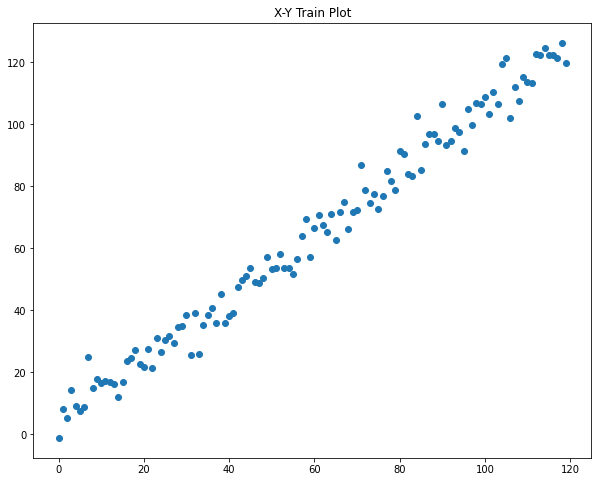

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.title('X-Y Train Plot')

## Metrics

In [10]:
def score (y_hat, y_truth):
    mse = mean_squared_error(y_hat, y_truth)
    mae = mean_absolute_error(y_hat, y_truth)
    return (mse, mae)

def scorePrivate (y_hat):
    return score(y_hat, y_private)

## Random Forest
### Random Train - Test Split

In [11]:
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.25)

Text(0.5, 1.0, 'Random Split X-y')

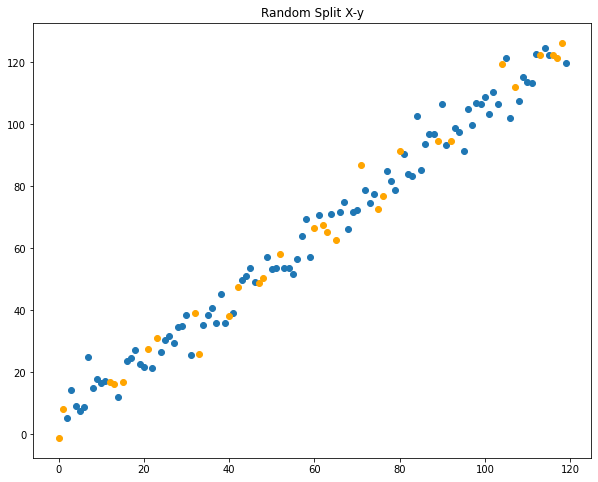

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train_rand, y_train_rand)
plt.scatter(X_test_rand, y_test_rand, color='orange')
plt.title('Random Split X-y')

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_rand.reshape(-1, 1), y_train_rand)